In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#set figsize
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [33]:
df = pd.read_csv('h02.csv',header=None,low_memory=False)

In [34]:
df.head()

,0,1
0,1991-07,0.429795
1,1991-08,0.400906
2,1991-09,0.432159
3,1991-10,0.492543
4,1991-11,0.502369


In [35]:
df[0] = pd.to_datetime(df[0])



In [54]:
# df.set_index(df[0],inplace=True)
# df.sort_index()

In [39]:
del df[0]

In [56]:
df.head()

,1
0,
1991-07-01,0.429795
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543
1991-11-01,0.502369


In [99]:
df[1].head()

0
1991-07-01    0.429795
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
Name: 1, dtype: float64

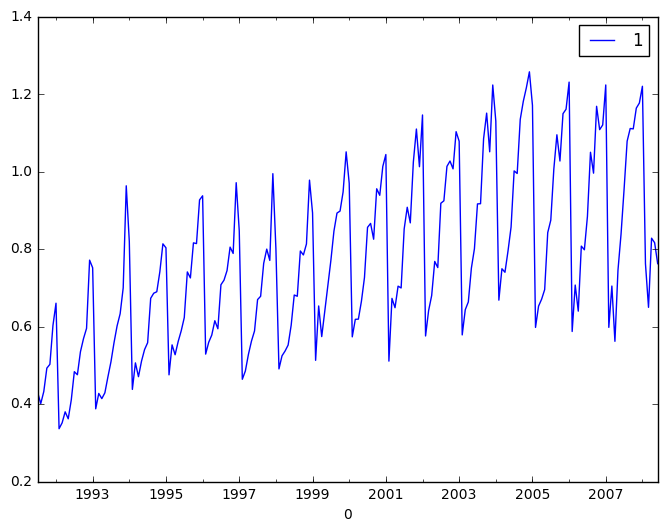

In [46]:
df.plot()

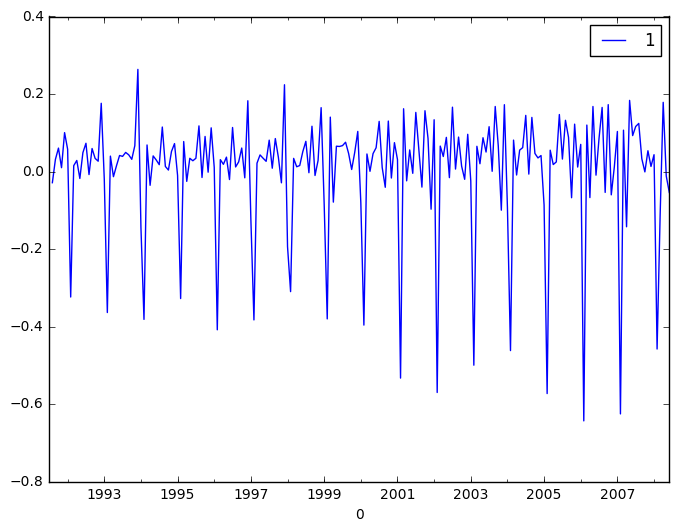

In [47]:
df.diff().plot()

In [51]:
print df.std()
print df.diff().std()#select diff =1
print df.diff().diff().std()

1    0.225124
dtype: float64
1    0.156222
dtype: float64
1    0.232546
dtype: float64


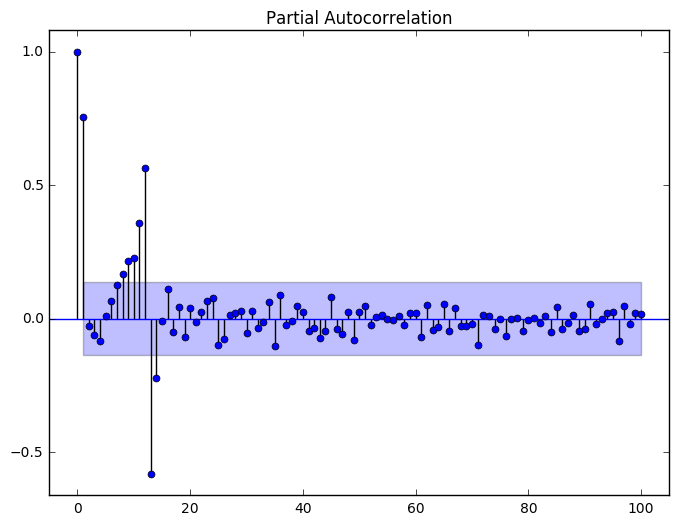

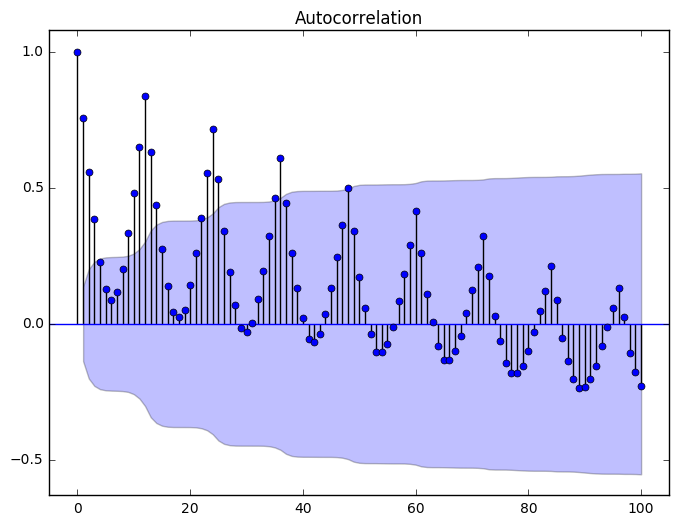

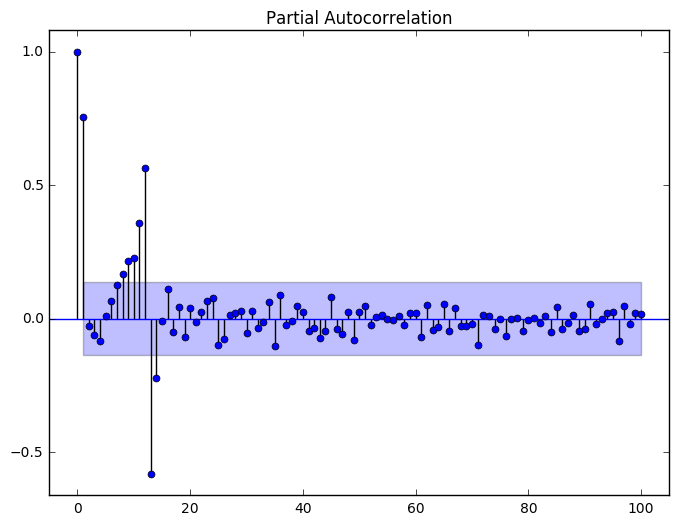

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df,lags=100)
plot_pacf(df,lags=100)

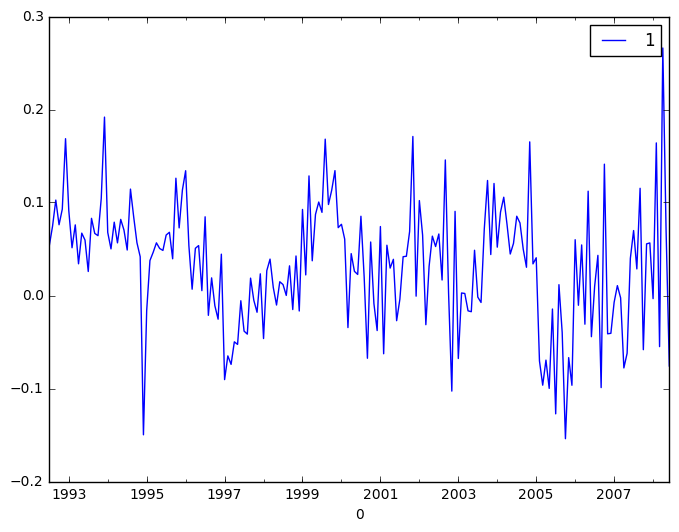

In [72]:
df.diff(periods=12)[12:].plot()

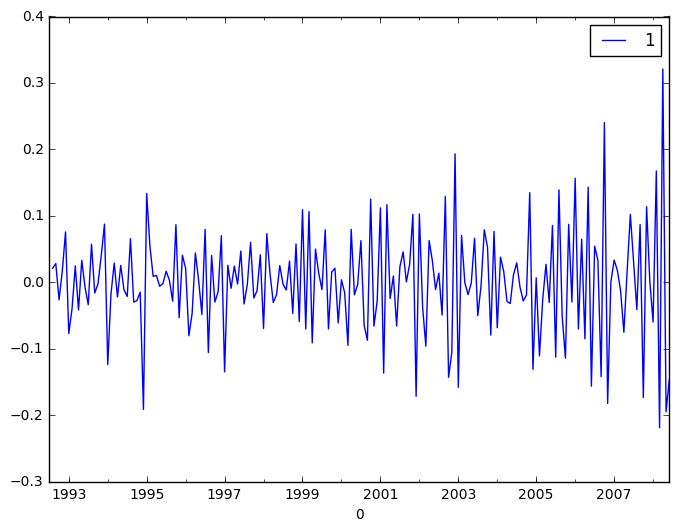

In [76]:
df.diff(periods=12)[12:].diff().plot()

In [75]:
print df.diff(periods=12)[12:].std()
print df.diff(periods=12)[12:].diff().std()

1    0.066751
dtype: float64
1    0.080462
dtype: float64


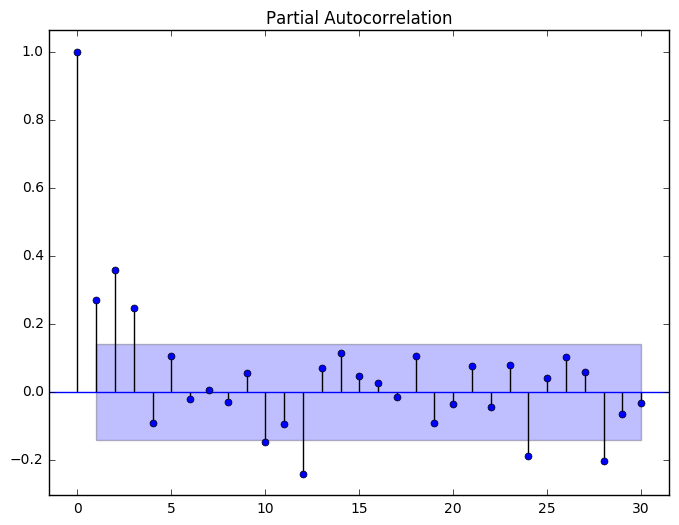

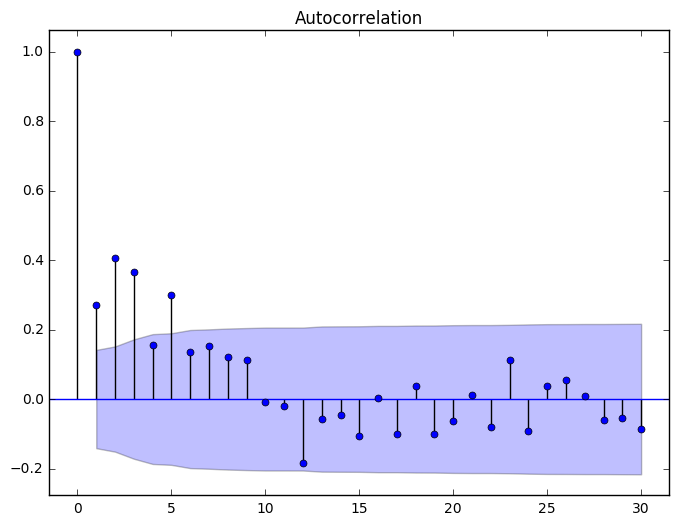

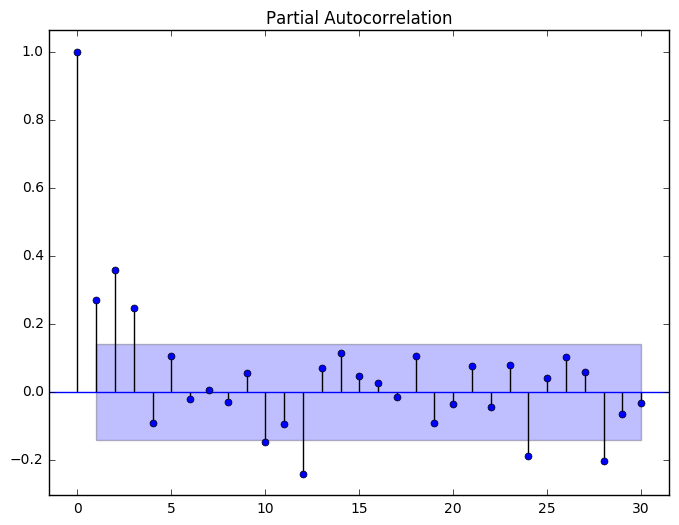

In [74]:
#diff1 = diff0.diff()[1:] #seasonal and non seasonal
plot_acf(df.diff(periods=12)[12:], lags=30)
plot_pacf(df.diff(periods=12)[12:], lags=30)

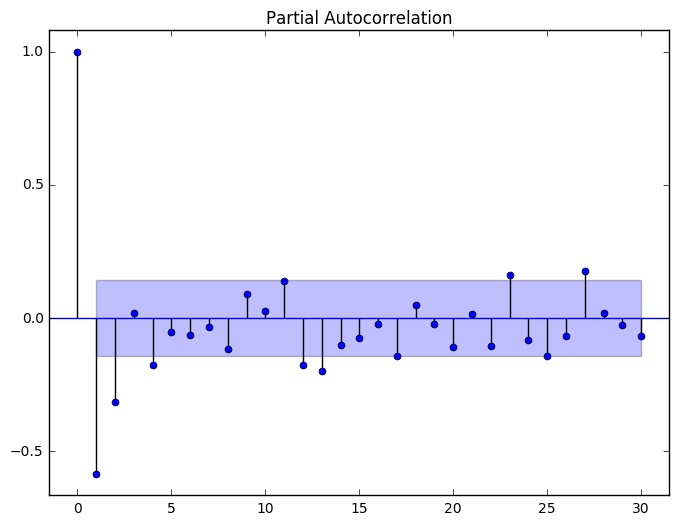

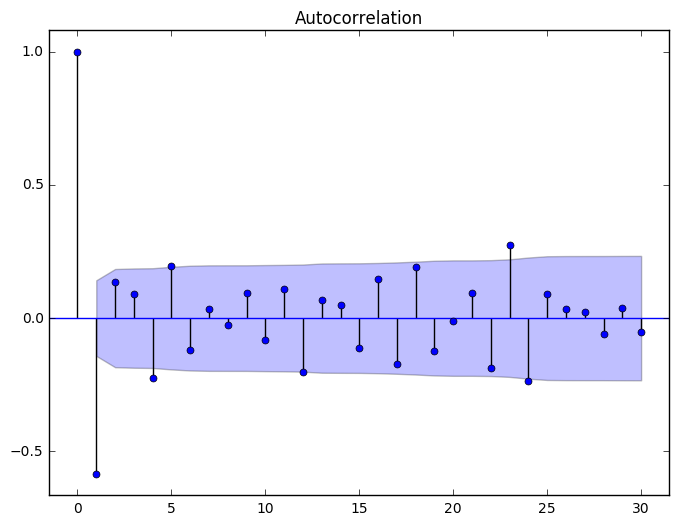

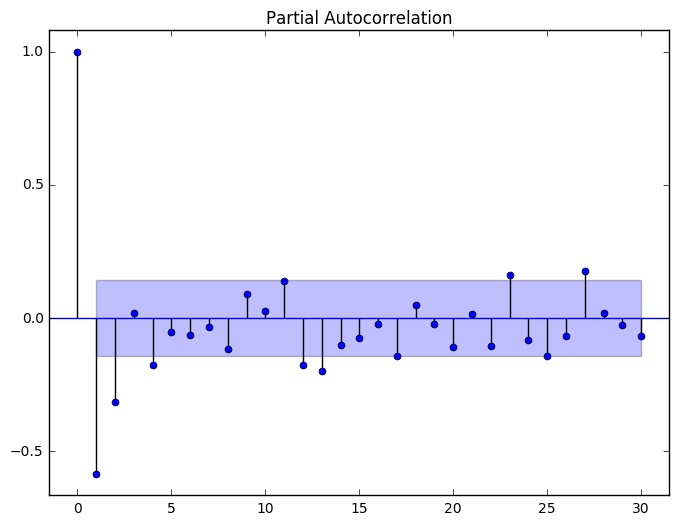

In [78]:
plot_acf(df.diff(periods=12)[12:].diff()[1:], lags=30)
plot_pacf(df.diff(periods=12)[12:].diff()[1:], lags=30)

In [110]:
l_data=np.log(df[1])

In [113]:
import statsmodels.api as sm
import numpy as np
model = sm.tsa.statespace.SARIMAX(l_data, order=(3,0,0), seasonal_order=(2,1,0,12),trend='c')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  1   No. Observations:                  204
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 245.570
Date:                            Fri, 23 Dec 2016   AIC                           -477.140
Time:                                    15:33:41   BIC                           -453.913
Sample:                                07-01-1991   HQIC                          -467.744
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0135      0.007      1.994      0.046       0.000       0.027
ar.L1          0.0735      0.068      1.085      0.278      -0.059       0.206
ar.L2          0.3695      0.052      7.066      0.000       0.267       0.472
ar.L3          0.3960      0.064      6.190      0.000       0.271       0.521
ar.S.L12      -0.4227      0.076     -5.574      0.000      -0.571      -0.274
ar.S.L24      -0.2831      0.085     -3.345      0.001      -0.449      -0.117
sigma2         0.0044      0.000     11.904      0.000       0.004       0.005
===================================================================================
Ljung-Box (Q):                       55.13   Jarque-Bera (JB):                11.77
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.02
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
model = sm.tsa.statespace.SARIMAX(df, order=(3,1,1), seasonal_order=(0,1,2,12))
results = model.fit()
results.summary()

/Users/user/anaconda/envs/statsmodeldevenv/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.7-x86_64.egg/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  1   No. Observations:                  204
Model:             SARIMAX(3, 1, 1)x(0, 1, 2, 12)   Log Likelihood                 285.887
Date:                            Fri, 23 Dec 2016   AIC                           -557.773
Time:                                    15:53:08   BIC                           -534.547
Sample:                                07-01-1991   HQIC                          -548.378
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3472      0.372     -3.620      0.000      -2.077      -0.618
ar.L2         -0.7588      0.345     -2.201      0.028      -1.435      -0.083
ar.L3         -0.0938      0.194     -0.483      0.629      -0.474       0.287
ma.L1          0.5627      0.361      1.560      0.119      -0.144       1.270
ma.S.L12      -0.4924      0.068     -7.218      0.000      -0.626      -0.359
ma.S.L24      -0.0860      0.079     -1.095      0.274      -0.240       0.068
sigma2         0.0028      0.000     10.749      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       70.75   Jarque-Bera (JB):                 2.11
Prob(Q):                              0.00   Prob(JB):                         0.35
Heteroskedasticity (H):               2.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

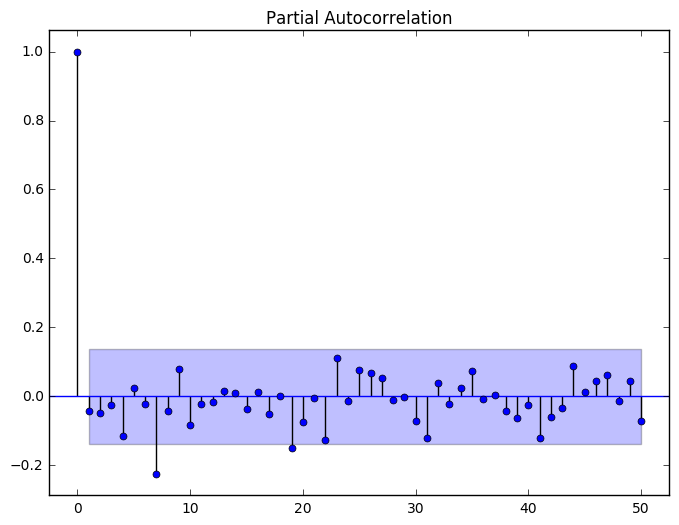

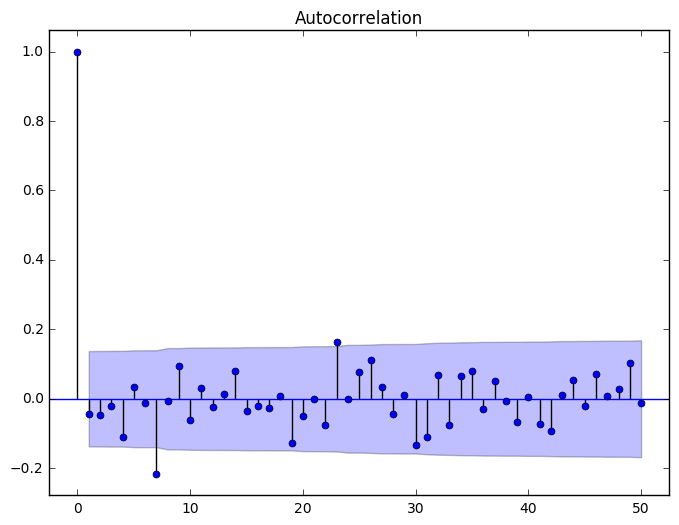

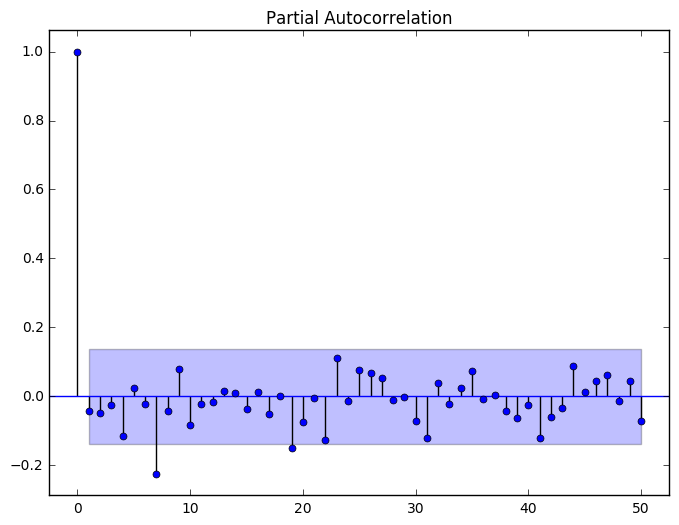

In [132]:
residuals = results.resid
plot_acf(residuals, lags=50)
plot_pacf(residuals, lags=50)

In [133]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(24, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)


(array([  0.37854397,   0.84808345,   0.94906309,   3.47163748,
          3.73273662,   3.7674162 ,  13.87637281,  13.88192293,
         15.77648592,  16.57443058,  16.8008411 ,  16.92960396,
         16.96319693,  18.34870955,  18.6316355 ,  18.72200987,
         18.88663253,  18.90162446,  22.63307484,  23.21704733,
         23.21762803,  24.54993722,  30.75028807,  30.75040459]),
 array([ 0.53838351,  0.65439658,  0.81357446,  0.48220401,  0.58849989,
         0.70811671,  0.05342438,  0.08489544,  0.07169842,  0.0843273 ,
         0.11390625,  0.15226462,  0.20099197,  0.19135716,  0.23091418,
         0.28334207,  0.33507805,  0.39790483,  0.25389012,  0.27826316,
         0.33248557,  0.31907711,  0.12905243,  0.16111049]))